In [1]:
# importing required libraries

import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Set the path to the Tesseract OCR executable
tesseract_path = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
pytesseract.pytesseract.tesseract_cmd = tesseract_path

### Converting the image to gray and use blurring inaddition to extracting the name and address

In [3]:
def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Extract regions for name and address as an image
    name_part = blurred[int(img.shape[0] * 0.3): int(img.shape[0] * 0.5)]
    address_part = blurred[int(img.shape[0] * 0.5): int(img.shape[0] * 0.8)]

    return name_part, address_part, blurred

### Extraction text from image 

In [4]:
# converting the image above into text and extarcting it

def extract_text(image):
    text = pytesseract.image_to_string(image, lang='ara').strip().replace('\n', ' ')
    return text

### Displaying the image on matplotlib in (canny edges , contours,blurred )

In [5]:
def display_images(edged, contours, blurred):
    plt.figure(figsize=(18, 6))

    plt.subplot(131), plt.imshow(edged, cmap="gray")
    plt.title('Canny Edges')

    plt.subplot(132), plt.imshow(contours, cmap="gray")
    plt.title('Contours')

    plt.subplot(133), plt.imshow(blurred, cmap="gray")
    plt.title('Blurred Image')

    plt.show()

In [6]:
def process_id_card(img_path):
    try:
        # Load the image
        img = cv2.imread(img_path, 1)

        if img is None:
            raise Exception(f"Error: Unable to read the image at {img_path}")

        # Resize the image
        img = cv2.resize(img, (750, 500))

        # Preprocess the image
        name_part, address_part, blurred = preprocess_image(img)

        # Extract text using Tesseract OCR
        name_text = extract_text(name_part)
        address_text = extract_text(address_part)

        # Create a dictionary with extracted information
        data = {
            "Name": [name_text],
            "Address": [address_text],
            # Add more fields as needed
        }

        # Convert the dictionary into a pandas DataFrame
        df = pd.DataFrame(data)

        # Display processed images
        edged = cv2.Canny(blurred, 30, 150)
        contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contour_img = np.zeros_like(edged)
        cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 2)

        display_images(edged, contour_img, blurred)

        return df

    except Exception as e:
        print(f"Error: {e}")
        return pd.DataFrame()

In [7]:
# D:\AI\Electropi\3.Computer vision foundation\Capstone\National-ID-Card-Recognition-main\80.jpg
def main():
    try:
        # Get the image path from the user
        image_path = input("Enter the path to the ID card image: ")

        # Check if the file has a valid JPEG extension
        if not image_path.lower().endswith(('.jpeg', '.jpg')):
            raise Exception("Error: The specified file is not a valid JPEG image.")

        # Process the ID card image
        result_df = process_id_card(image_path)

        if not result_df.empty:
            # Display the result
            print(result_df)

    except Exception as e:
        print(f"Error: {e}")

Enter the path to the ID card image: D:\AI\Electropi\3.Computer vision foundation\Capstone\National-ID-Card-Recognition-main\80.jpg


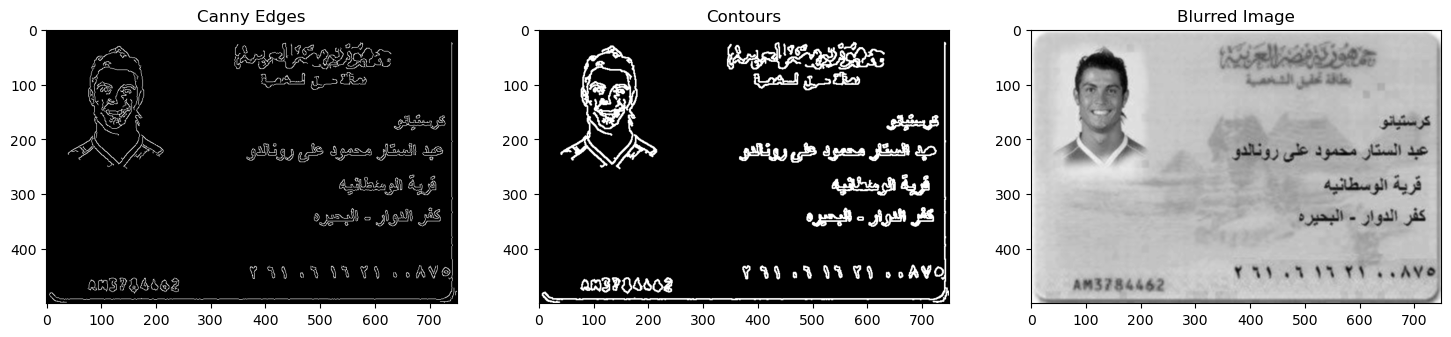

                                         Name  \
0  كرستيانو عبد الستار مخمود على رونالدو  ار"   

                               Address  
0  قرية الوسطانيه كفر الدوار - البحيره  


In [8]:
if __name__ == "__main__":
    main()